# DATA SCIENCE INTERSHIP (OIBSIP)

# Task5 - Sales Prediction using Python

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.


Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

## Intern - Shweta Alukuru Trikutam

# 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding the Dataset

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# 3. Data Preprocessing 

## 3.1 Drop the unnecessary column

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 3.2 Checking for missing values

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

> No missing values

# 4. EDA

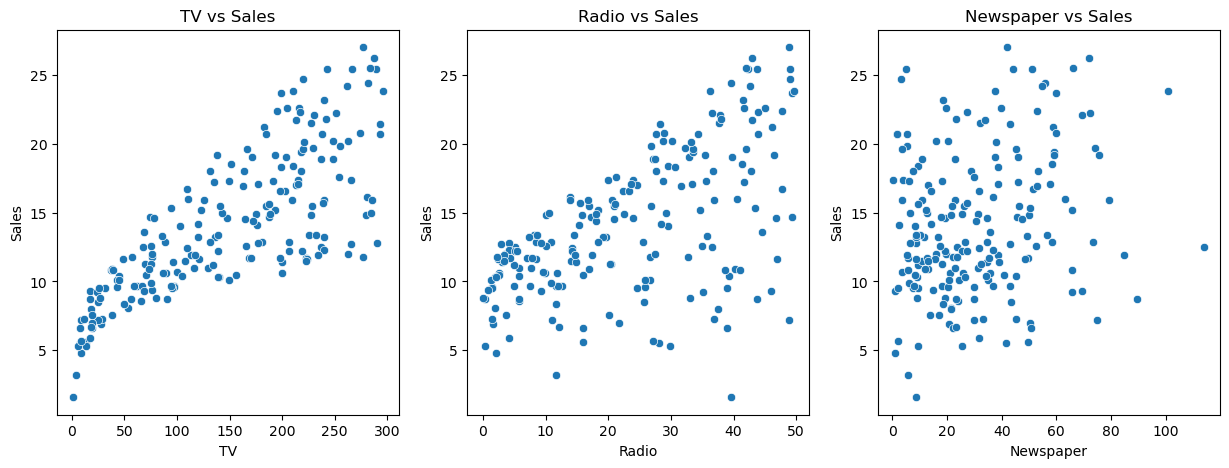

In [10]:
# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')

plt.show()

<Axes: title={'center': 'PLOT FOR TV'}, xlabel='TV', ylabel='Count'>

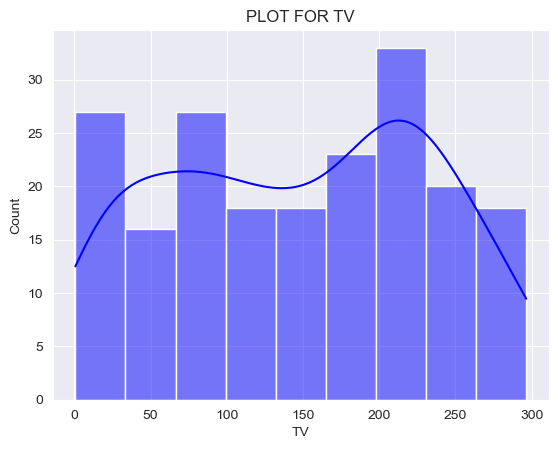

In [11]:
sns.set_style("darkgrid")
plt.title("PLOT FOR TV")
sns.histplot(df["TV"],color="blue",kde=True)

<Axes: title={'center': 'PLOT FOR Radio'}, xlabel='Radio', ylabel='Count'>

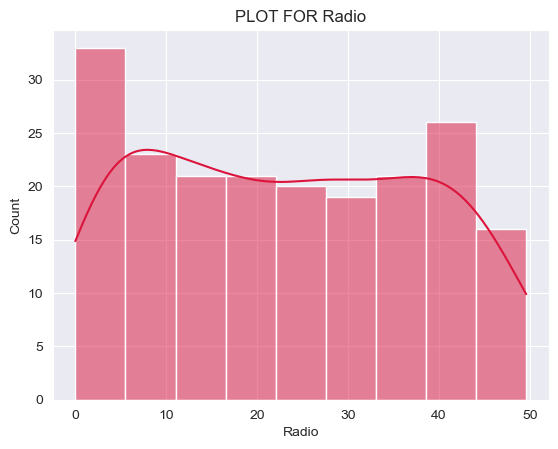

In [12]:
sns.set_style("darkgrid")
plt.title("PLOT FOR Radio")
sns.histplot(df["Radio"],color="crimson",kde=True)

<Axes: title={'center': 'PLOT FOR Newspaper'}, xlabel='Newspaper', ylabel='Count'>

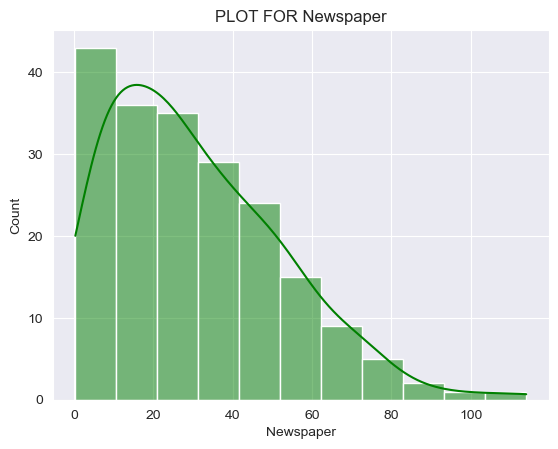

In [13]:
sns.set_style("darkgrid")
plt.title("PLOT FOR Newspaper")
sns.histplot(df["Newspaper"],color="green",kde=True)

<Axes: title={'center': 'PLOT FOR Sales'}, xlabel='Sales', ylabel='Count'>

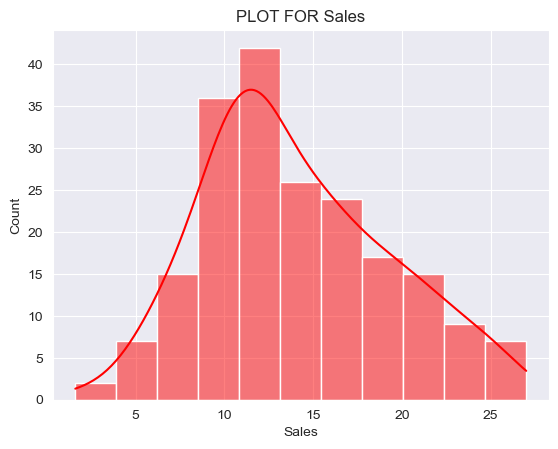

In [14]:
sns.set_style("darkgrid")
plt.title("PLOT FOR Sales")
sns.histplot(df["Sales"],color="red",kde=True)

## Corelation Matrix

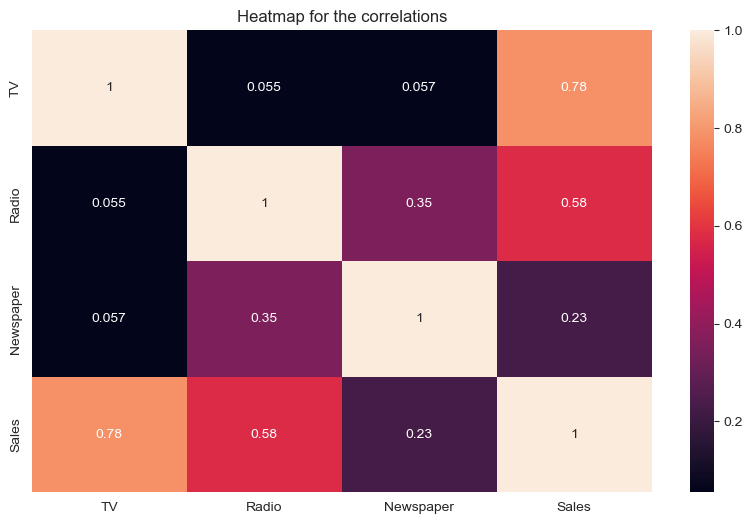

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap for the correlations")
plt.show()

> `TV` vs `Sales` have the highest correlation followed by `Radio` vs `Sales`


# 5. Model Building

### I am using Linear Regression model to predict sales based on advertising spending.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [17]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Train the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 3.80
R^2 Score: 0.86
Root Mean Squared Error: 1.95


In [21]:
print("TESTING ACCCURACY AND LOSS")
print("acc: ",model.score(X_test,y_test)*100)
print("loss: ",mse)

TESTING ACCCURACY AND LOSS
acc:  86.09466508230368
loss:  3.796797236715221


In [22]:
print("TRAINING ACCCURACY AND LOSS")
print("acc: ",model.score(X_train,y_train)*100)
print("loss: ",mse)

TRAINING ACCCURACY AND LOSS
acc:  90.55159502227752
loss:  3.796797236715221


## Visualize the model's predictions

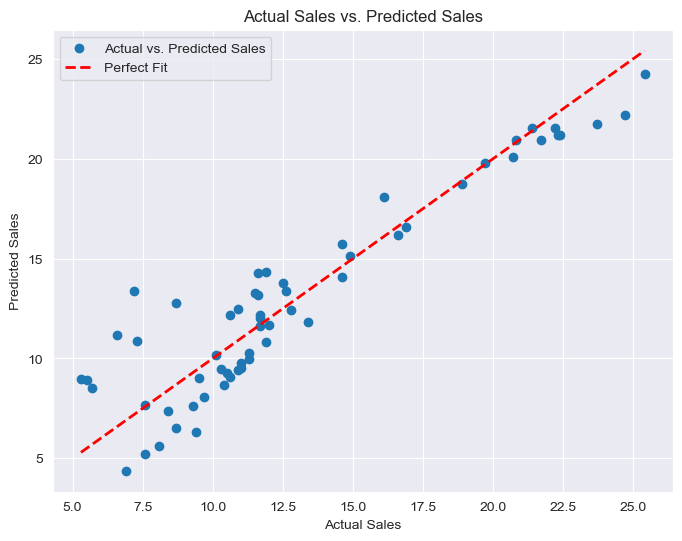

In [23]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()